# <font color=dark>A Simple Recommender System to Identify Movies on Ratings</font>

<hr style="border:2px solid gray">

## <font color=blue>Objective</font>

1. Created a Prequisite of IMDB Movies.
    a. Min number of votes = 80th percentile votes.
    b. Movie runtime is b/w 45 to 300 min    
2. Choosing a Metric to rate the movies i.e. Weighted Ratio used by IMDB (searched the same on Google).
   It is based on the movie rating and the number of votes it has garnered (a proxy for popularity). 
   The Idea to choose a metric is not to chose vote_average, as it can create a bias.
   The metric created would give a greater preference to a blockbuster movie rated 8 by 100,000 users over an comedy movie rated 9 by 100 users.
3. Calculated the scores of each Movies   
4. Displayed the score of top 25 movies in descending order.


<hr style="border:2px solid gray">

## <font color=blue>Importing Libraries & Data Pre-Processing</font>

In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('movies_metadata.csv')
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,30-10-1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,15-12-1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,22-12-1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,22-12-1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,10-02-1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [20]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

<hr style="border:2px solid gray">

## <font color=blue>Calculating Weighted Rating of Movies at IMDB</font>


Source:-
https://www.google.com/search?q=weighted+rating+formula+imdb&rlz=1C1CHBF_enIN974IN974&sxsrf=ALiCzsYcqF6wLioXuDLD6CZSTVbCnumf3w%3A1662275629310&ei=LVAUY6TGEtWQseMPz6WP8AM&oq=weighted+rating+formula&gs_lcp=Cgdnd3Mtd2l6EAEYADIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwAzIKCAAQRxDWBBCwA0oECEEYAEoECEYYAFAAWABg2A1oAXABeACAAQCIAQCSAQCYAQDIAQjAAQE&sclient=gws-wiz


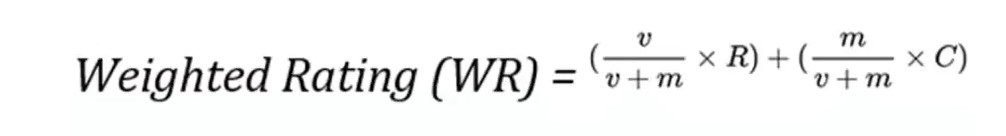



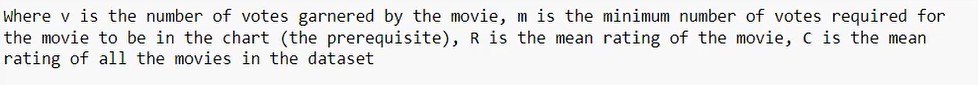

In [37]:
# Calculate the number of votes garnered by the 80th percentile movie
# It means for a movie to be considered in the rankings, it must have garnered more votes than at least 80% of the movies present in our dataset
# well we chose 80th percentile ranomly, can choose any value as per business requirement, as there is no perfect value of m
# The higher the value of m, the higher the emphasis on the popularity of a movie, and therefore the higher the selectivity.
m = df['vote_count'].quantile(0.80)
m

50.0

In [30]:
#Only consider movies longer than 45 minutes and shorter than 300 minutes
movies_duration = df[(df['runtime'] >= 45) & (df['runtime'] <= 300)]

#Only consider movies that have garnered more than m votes
movies_duration = movies_duration[movies_duration['vote_count'] >= m]

#Inspect the number of movies that made the cut
movies_duration.shape

(8963, 24)

In [38]:
# Calculate Mean Rating of all movies in data set i.e. C for WR formula
C = df['vote_average'].mean()
C

5.618207215133889

In [33]:
# Function to compute the IMDB weighted rating for each movie
# The values for v and R for every movie in the form of the vote_count and vote_average features respectively in the data set.

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Compute the weighted score
    return (v/(v+m) * R) + (m/(m+v) * C)

In [34]:
# Compute the score using the weighted_rating function defined above
movies_duration['score'] = movies_duration.apply(weighted_rating, axis=1)

In [35]:
#Sort movies in descending order of their scores
movies_duration = movies_duration.sort_values('score', ascending=False)

#Print the top 25 movies
movies_duration[['title', 'vote_count', 'vote_average', 'score', 'runtime']].head(25)

,title,vote_count,vote_average,score,runtime
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.855148,190.0
314,The Shawshank Redemption,8358.0,8.5,8.482863,142.0
834,The Godfather,6024.0,8.5,8.476278,175.0
40248,Your Name.,1030.0,8.5,8.366584,106.0
12481,The Dark Knight,12269.0,8.3,8.289115,152.0
2843,Fight Club,9678.0,8.3,8.286216,139.0
292,Pulp Fiction,8670.0,8.3,8.284623,154.0
522,Schindler's List,4436.0,8.3,8.270109,195.0
23672,Whiplash,4376.0,8.3,8.269704,105.0
5481,Spirited Away,3968.0,8.3,8.266628,125.0


<hr style="border:2px solid gray">

## <font color=blue>Conclusion</font>


### DDLJ is highes rated movie in IMDB DB present followed by The Shawsank Redemption & The Godfather. But as we can see vote_count of DDLJ is less, here we can modify 'm'.

### This Recommender system did not take into consideration any of the individual user's preferences.

<hr style="border:2px solid gray">